# **B0: Thư viện sử dụng**

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **B1: Đọc dữ liệu**

In [ ]:
# Đọc dữ liệu từ file Excel
file_path = '/content/drive/MyDrive/LayerClassification/data1.xlsx'
df = pd.read_excel(file_path)

# Lọc dữ liệu: lấy 13 thuộc tính B1, B2, ..., B13 và cột nhãn Label
X = df[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13']].values
y = df['Label'].values  # Lấy dữ liệu của cột Label
y = df['Label'].values - 1 #chuyển min của label index từ 1 về 0 cho thuận tiện

# Chuẩn hóa dữ liệu: chuẩn hóa z-score (đưa dữ liệu về dạng có trung bình bằng 0 và phương sai bằng 1).
scaler = StandardScaler()
X = scaler.fit_transform(X) #đưa X về 1 vector được chuẩn hóa với giá trị trung bình được tính trên từng cột

# **B2: Các cấu trúc lớp ẩn thử nghiệm**

In [ ]:
#8-16-32-64-64-32-16-8
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 8),          # Lớp đầu tiên với 8 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(8, 16),          # Lớp ẩn thứ hai với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 32),         # Lớp ẩn thứ ba với 32 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 64),         # Lớp ẩn thứ tư với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 64),         # Lớp ẩn thứ năm với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 32),         # Lớp ẩn thứ sáu với 32 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 16),         # Lớp ẩn thứ bảy với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 8),          # Lớp ẩn thứ tám với 8 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(8, 5),           # Lớp đầu ra với 5 neuron
            nn.LeakyReLU(negative_slope=0.02)
        )

    def forward(self, x):
        return self.network(x)


In [ ]:
#16-32-64-64-32-16
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 16),          # Lớp đầu tiên với 8 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 32),         # Lớp ẩn thứ ba với 32 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 64),         # Lớp ẩn thứ tư với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 64),         # Lớp ẩn thứ năm với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 32),         # Lớp ẩn thứ sáu với 32 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 16),         # Lớp ẩn thứ bảy với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 5),          # Lớp ẩn thứ tám với 8 neuron
            nn.LeakyReLU(negative_slope=0.02)
        )

    def forward(self, x):
        return self.network(x)


In [ ]:
#32-64-64-32-16
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 32),          # Lớp đầu tiên với 8 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 64),         # Lớp ẩn thứ tư với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 64),         # Lớp ẩn thứ năm với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 32),         # Lớp ẩn thứ sáu với 32 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 16),         # Lớp ẩn thứ bảy với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 5),          # Lớp ẩn thứ tám với 8 neuron
            nn.LeakyReLU(negative_slope=0.02)
        )

    def forward(self, x):
        return self.network(x)


In [ ]:
#32-64-64-32
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 32),          # Lớp đầu tiên với 8 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 64),         # Lớp ẩn thứ tư với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 5),         # Lớp ẩn thứ bảy với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
        )

    def forward(self, x):
        return self.network(x)


In [ ]:
#16-32-32-16
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 16),          # Lớp đầu tiên với 8 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 32),         # Lớp ẩn thứ tư với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 32),         # Lớp ẩn thứ tư với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 16),         # Lớp ẩn thứ năm với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 5),         # Lớp ẩn thứ sáu với 32 neuron
            nn.LeakyReLU(negative_slope=0.02),
        )

    def forward(self, x):
        return self.network(x)


In [ ]:
#16-32-16
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 16),          # Lớp đầu tiên với 8 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 32),         # Lớp ẩn thứ tư với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(32, 16),         # Lớp ẩn thứ năm với 64 neuron
            nn.LeakyReLU(negative_slope=0.02),
            nn.Linear(16, 5),         # Lớp ẩn thứ sáu với 32 neuron
            nn.LeakyReLU(negative_slope=0.02),
        )

    def forward(self, x):
        return self.network(x)


Fold 1/10
Epoch [1/120], Train Loss: 0.7900, Validation Loss: 0.2899
Epoch [16/120], Train Loss: 0.0694, Validation Loss: 0.0971
Epoch [31/120], Train Loss: 0.0350, Validation Loss: 0.1146
Epoch [46/120], Train Loss: 0.0219, Validation Loss: 0.1132
Epoch [61/120], Train Loss: 0.0253, Validation Loss: 0.1006
Epoch [76/120], Train Loss: 0.0085, Validation Loss: 0.1158
Epoch [91/120], Train Loss: 0.0416, Validation Loss: 0.1492
Epoch [106/120], Train Loss: 0.0029, Validation Loss: 0.1444
Fold 1/10 - Test Accuracy on fixed test set: 98.67%
Fold 1/10 - Duration: 54.41 seconds
Fold 2/10
Epoch [1/120], Train Loss: 0.9010, Validation Loss: 0.2484
Epoch [16/120], Train Loss: 0.0728, Validation Loss: 0.0901
Epoch [31/120], Train Loss: 0.0362, Validation Loss: 0.0875
Epoch [46/120], Train Loss: 0.0221, Validation Loss: 0.1155
Epoch [61/120], Train Loss: 0.0083, Validation Loss: 0.1152
Epoch [76/120], Train Loss: 0.0149, Validation Loss: 0.1534
Epoch [91/120], Train Loss: 0.0024, Validation Loss: 

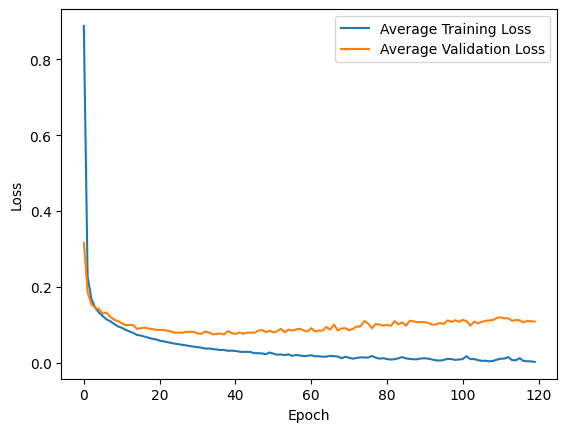

Average Test Accuracy over 10 folds on fixed test set: 98.42%
Average Duration per Fold: 54.08 seconds


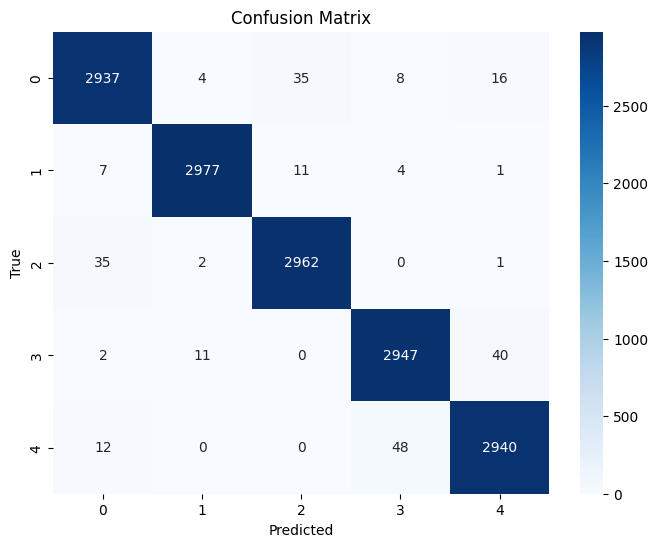


Classification Report:
              precision    recall  f1-score   support

           0     0.9813    0.9790    0.9801      3000
           1     0.9943    0.9923    0.9933      3000
           2     0.9847    0.9873    0.9860      3000
           3     0.9800    0.9823    0.9812      3000
           4     0.9807    0.9800    0.9803      3000

    accuracy                         0.9842     15000
   macro avg     0.9842    0.9842    0.9842     15000
weighted avg     0.9842    0.9842    0.9842     15000



In [ ]:
import time
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import torch.optim as optim
import torch
from torch import nn
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chia dữ liệu gốc thành 80% cho Huấn luyện (dựa trên StratifiedKFold) và 20% cho testing (mô hình chưa nhìn thấy)
# stratify=y đảm bảo rằng việc chia dữ liệu huấn luyện/testing cân bằng các lớp
# Ví dụ như là tỷ lệ nhãn 0,1 của tập train là [0.9,0.1] thì tập test cũng là [0.9 và 0.1]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Khởi tạo StratifiedKFold cho dữ liệu huấn luyện/validation (80% dữ liệu)
k_folds = 10
num_epochs = 120
all_fold_accuracies = [] #mảng chứa độ chính xác (thử trên tập testing) của folds lần huấn luyện -> để tính trung bình
all_fold_train_losses = [] #mảng chứa hàm mất mát của tập huấn luyện của folds lần huấn luyện -> để tính trung bình
all_fold_val_losses = [] #mảng chứa hàm mất mát của tập xác thực của folds lần huấn luyện -> để tính trung bình
fold_times = []  # Danh sách lưu trữ thời gian của mỗi fold -> để tính trung bình

# Khởi tạo StratifiedKFold với k_folds = 10
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

all_y_true = [] #mảng chứa nhãn y
all_y_pred = [] #mảng chứa dự đoán
#2 mảng này để thực hiện vẽ Confusion Matrix

#Thực hiện huấn luyện lần lượt qua các folds
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    print(f"Fold {fold + 1}/{k_folds}")

    # Lấy dữ liệu cho fold hiện tại từ phần dữ liệu huấn luyện/validation
    # X_train_fold là 9/10 của tập train gốc, X_val_fold là 1/10 của tập train gốc
    # Y_train_fold, Y_val_fold là nhãn tương ứng.
    X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
    y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

    # Chuyển đổi dữ liệu thành tensor
    X_train_fold, y_train_fold = torch.tensor(X_train_fold, dtype=torch.float32), torch.tensor(y_train_fold, dtype=torch.long)
    X_val_fold, y_val_fold = torch.tensor(X_val_fold, dtype=torch.float32), torch.tensor(y_val_fold, dtype=torch.long)

    # Tạo DataLoader cho tập huấn luyện và validation của fold hiện tại
    train_loader = data.DataLoader(data.TensorDataset(X_train_fold, y_train_fold), batch_size=32, shuffle=True)
    val_loader = data.DataLoader(data.TensorDataset(X_val_fold, y_val_fold), batch_size=32)

    # Khởi tạo lại mô hình và optimizer cho fold hiện tại
    model = NeuralNetwork() #Mô hình MLP
    criterion = nn.CrossEntropyLoss() #Hàm mất mát xác thực chéo
    optimizer = optim.Adam(model.parameters(), lr=0.001) #Thuật toán tối ưu Adam

    train_losses = [] #mảng chứa hàm mất mát huấn luyện qua từng epoch
    val_losses = [] #mảng chứa hàm mất mát xác thực qua từng epoch


    # Bắt đầu đo thời gian cho fold hiện tại
    start_time = time.time()

    for epoch in range(num_epochs):
        # Chế độ huấn luyện
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad() #khởi tạo lại optimizer, tránh tích lũy gradient qua các batch
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Cập nhật trọng số
            loss.backward() #backprop
            optimizer.step() #thực hiện cập nhật trọng số
            train_loss += loss.item()
        train_loss /= len(train_loader) #tính toán mất mát trong 1 epoch ( 1/m * sum(loss) )
        train_losses.append(train_loss) #thêm giá trị loss của epoch này vào mảng train_loss

        # Chế độ đánh giá trên tập validation của epoch này.
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs) #dự đoán mô hình
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_loss /= len(val_loader) #tính toán mất mát trong 1 epoch ( 1/m * sum(loss) )
        val_losses.append(val_loss) #thêm giá trị loss của epoch này vào mảng val_loss

        if epoch % 15 == 0: #mỗi 15 epoch sẽ in ra loss hiện tại của train và val
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    # Ra khỏi huấn luyện, kết thúc fold
    # Đo thời gian kết thúc cho fold hiện tại
    end_time = time.time()
    fold_duration = end_time - start_time
    fold_times.append(fold_duration)


    all_fold_train_losses.append(train_losses) #thêm mảng loss [l1,l2,l3,...] của huấn luyện của fold hiện tại vào mảng
    all_fold_val_losses.append(val_losses) #thêm mảng loss [l1,l2,l3,...] của xác thực của fold hiện tại vào mảng

    # Đánh giá mô hình trên tập kiểm thử cố định (20%) sau mỗi lần huấn luyện
    model.eval()
    y_pred = []
    y_true = []

    # Chuyển đổi tập kiểm thử cố định thành tensor và DataLoader
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    test_loader = data.DataLoader(data.TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    all_fold_accuracies.append(accuracy) #Thêm giá trị độ chính xác của mô hình dự đoán của fold hiện tại
    all_y_true.extend(y_true)  # Thu thập nhãn thực tế
    all_y_pred.extend(y_pred)  # Thu thập nhãn dự đoán
    print(f"Fold {fold + 1}/{k_folds} - Test Accuracy on fixed test set: {accuracy * 100:.2f}%")
    print(f"Fold {fold + 1}/{k_folds} - Duration: {fold_duration:.2f} seconds")


#Kết thúc tất cả các folds.
# Tính trung bình loss và accuracy qua tất cả các folds
avg_train_loss = [np.mean([fold_loss[epoch] for fold_loss in all_fold_train_losses]) for epoch in range(num_epochs)] #train_loss trung bình trên tất cả folds trên từng epoch
avg_val_loss = [np.mean([fold_loss[epoch] for fold_loss in all_fold_val_losses]) for epoch in range(num_epochs)] # val_loss trung bình trên tất cả các folds trên từng epoch
avg_accuracy = np.mean(all_fold_accuracies)  #độ chính xác trung bình tất cả các folds
avg_fold_time = np.mean(fold_times) #thời gian trung bình tất cả các fold

# Vẽ biểu đồ hàm loss trung bình của training và validation qua các fold
plt.plot(range(num_epochs), avg_train_loss, label='Average Training Loss')
plt.plot(range(num_epochs), avg_val_loss, label='Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#in ra trên folds lần, độ chính xác trung bình là:
print(f"Average Test Accuracy over {k_folds} folds on fixed test set: {avg_accuracy * 100:.2f}%")
#in ra trên folds lần, thời gian huấn luyện trung bình là:
print(f"Average Duration per Fold: {avg_fold_time:.2f} seconds")

# Tính confusion matrix tất cả giá trị trên 10 folds
conf_matrix = confusion_matrix(all_y_true, all_y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tính accuracy, precision, recall và f1-score
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, digits=4))


# **B3: Thực hiện điều chỉnh siêu tham số cải thiện mô hình**

**1. Mạng sử dụng**

In [ ]:
#32-64-64-32
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob = 0):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(32, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(32, 5),         # Lớp ẩn thứ bảy với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
        )

    def forward(self, x):
        return self.network(x)


**2. Thực hiện GridSearch**



Testing combination: learning_rate=0.01, weight_decay=0, dropout_prob=0

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:41<00:00,  2.87it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.94it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.28it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.52it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:33<00:00,  3.59it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:33<00:00,  3.56it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.41it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.48it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:33<00:00,  3.60it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:33<00:00,  3.56it/s]



Results for combination: learning_rate=0.01, weight_decay=0, dropout_prob=0
Average Accuracy: 97.90%
Average Fold Duration: 35.72 seconds


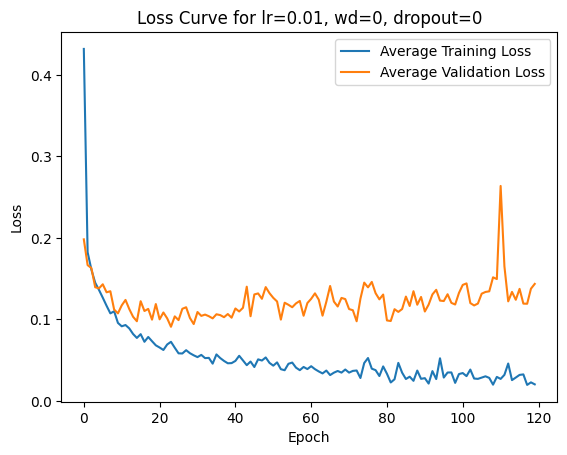


Classification Report:
              precision    recall  f1-score   support

           0     0.9660    0.9750    0.9705      3000
           1     0.9923    0.9897    0.9910      3000
           2     0.9776    0.9760    0.9768      3000
           3     0.9800    0.9823    0.9812      3000
           4     0.9792    0.9720    0.9756      3000

    accuracy                         0.9790     15000
   macro avg     0.9790    0.9790    0.9790     15000
weighted avg     0.9790    0.9790    0.9790     15000


Testing combination: learning_rate=0.01, weight_decay=0, dropout_prob=0.2

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.07it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.02it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.99it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Results for combination: learning_rate=0.01, weight_decay=0, dropout_prob=0.2
Average Accuracy: 96.59%
Average Fold Duration: 38.83 seconds


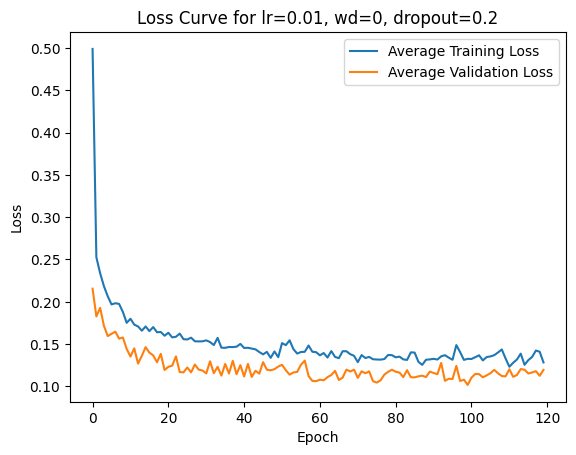


Classification Report:
              precision    recall  f1-score   support

           0     0.9326    0.9683    0.9501      3000
           1     0.9833    0.9843    0.9838      3000
           2     0.9807    0.9337    0.9566      3000
           3     0.9712    0.9673    0.9693      3000
           4     0.9635    0.9757    0.9695      3000

    accuracy                         0.9659     15000
   macro avg     0.9663    0.9659    0.9659     15000
weighted avg     0.9663    0.9659    0.9659     15000


Testing combination: learning_rate=0.01, weight_decay=0, dropout_prob=0.5

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.08it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.14it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.14it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.09it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.10it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.94it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]



Results for combination: learning_rate=0.01, weight_decay=0, dropout_prob=0.5
Average Accuracy: 94.53%
Average Fold Duration: 38.80 seconds


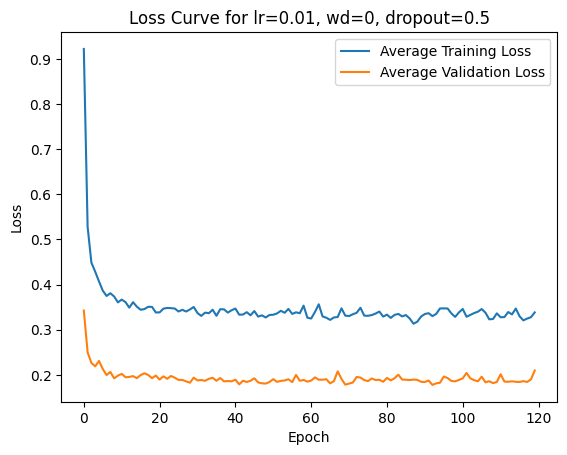


Classification Report:
              precision    recall  f1-score   support

           0     0.8979    0.9350    0.9161      3000
           1     0.9615    0.9730    0.9672      3000
           2     0.9679    0.8937    0.9293      3000
           3     0.9531    0.9610    0.9570      3000
           4     0.9498    0.9640    0.9568      3000

    accuracy                         0.9453     15000
   macro avg     0.9460    0.9453    0.9453     15000
weighted avg     0.9460    0.9453    0.9453     15000


Testing combination: learning_rate=0.01, weight_decay=0.1, dropout_prob=0

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.32it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.41it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.35it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.38it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.33it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.29it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.42it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.40it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.42it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.39it/s]



Results for combination: learning_rate=0.01, weight_decay=0.1, dropout_prob=0
Average Accuracy: 20.00%
Average Fold Duration: 35.60 seconds


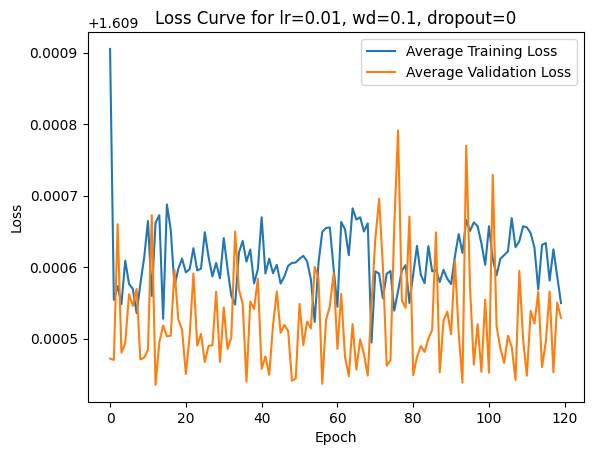


Classification Report:
              precision    recall  f1-score   support

           0     0.2000    0.3000    0.2400      3000
           1     0.2000    0.2000    0.2000      3000
           2     0.2000    0.1000    0.1333      3000
           3     0.2000    0.1000    0.1333      3000
           4     0.2000    0.3000    0.2400      3000

    accuracy                         0.2000     15000
   macro avg     0.2000    0.2000    0.1893     15000
weighted avg     0.2000    0.2000    0.1893     15000


Testing combination: learning_rate=0.01, weight_decay=0.1, dropout_prob=0.2

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.03it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.14it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]



Results for combination: learning_rate=0.01, weight_decay=0.1, dropout_prob=0.2
Average Accuracy: 20.00%
Average Fold Duration: 38.60 seconds


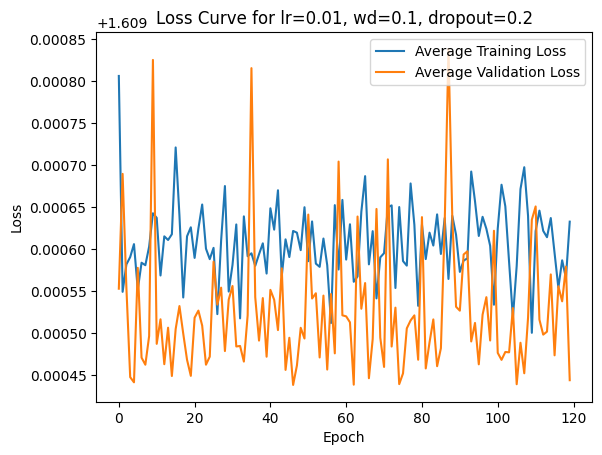

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
              precision    recall  f1-score   support

           0     0.2000    0.2000    0.2000      3000
           1     0.0000    0.0000    0.0000      3000
           2     0.2000    0.2000    0.2000      3000
           3     0.2000    0.1000    0.1333      3000
           4     0.2000    0.5000    0.2857      3000

    accuracy                         0.2000     15000
   macro avg     0.1600    0.2000    0.1638     15000
weighted avg     0.1600    0.2000    0.1638     15000


Testing combination: learning_rate=0.01, weight_decay=0.1, dropout_prob=0.5

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.07it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.10it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.09it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.06it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.10it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.09it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.07it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Results for combination: learning_rate=0.01, weight_decay=0.1, dropout_prob=0.5
Average Accuracy: 20.00%
Average Fold Duration: 39.06 seconds


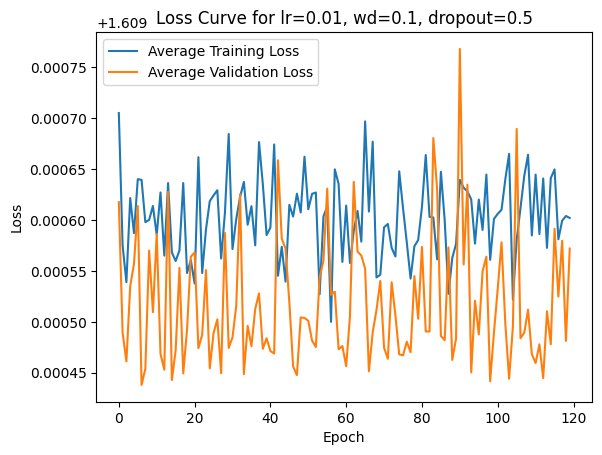

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      3000
           1     0.2000    0.4000    0.2667      3000
           2     0.0000    0.0000    0.0000      3000
           3     0.2000    0.5000    0.2857      3000
           4     0.2000    0.1000    0.1333      3000

    accuracy                         0.2000     15000
   macro avg     0.1200    0.2000    0.1371     15000
weighted avg     0.1200    0.2000    0.1371     15000


Testing combination: learning_rate=0.01, weight_decay=0.01, dropout_prob=0

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.41it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.52it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.42it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.41it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.34it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.40it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.42it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.41it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.39it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.31it/s]



Results for combination: learning_rate=0.01, weight_decay=0.01, dropout_prob=0
Average Accuracy: 94.03%
Average Fold Duration: 35.29 seconds


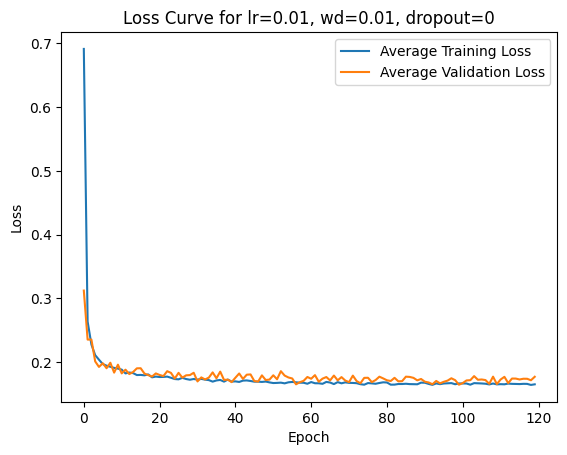


Classification Report:
              precision    recall  f1-score   support

           0     0.9053    0.9273    0.9162      3000
           1     0.9473    0.9760    0.9614      3000
           2     0.9557    0.8913    0.9224      3000
           3     0.9381    0.9603    0.9491      3000
           4     0.9569    0.9463    0.9516      3000

    accuracy                         0.9403     15000
   macro avg     0.9406    0.9403    0.9401     15000
weighted avg     0.9406    0.9403    0.9401     15000


Testing combination: learning_rate=0.01, weight_decay=0.01, dropout_prob=0.2

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:42<00:00,  2.82it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.99it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.96it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.02it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.02it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.01it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.01it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:41<00:00,  2.88it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Results for combination: learning_rate=0.01, weight_decay=0.01, dropout_prob=0.2
Average Accuracy: 93.57%
Average Fold Duration: 40.38 seconds


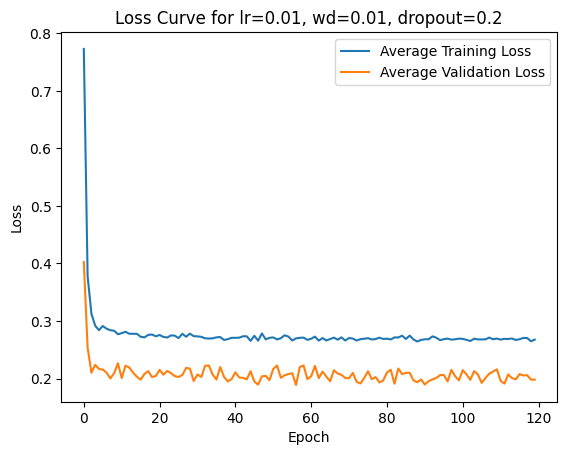


Classification Report:
              precision    recall  f1-score   support

           0     0.8966    0.9273    0.9117      3000
           1     0.9514    0.9587    0.9550      3000
           2     0.9465    0.8793    0.9117      3000
           3     0.9426    0.9583    0.9504      3000
           4     0.9430    0.9547    0.9488      3000

    accuracy                         0.9357     15000
   macro avg     0.9360    0.9357    0.9355     15000
weighted avg     0.9360    0.9357    0.9355     15000


Testing combination: learning_rate=0.01, weight_decay=0.01, dropout_prob=0.5

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.05it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.00it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:41<00:00,  2.91it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.93it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.94it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.07it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.03it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.08it/s]



Results for combination: learning_rate=0.01, weight_decay=0.01, dropout_prob=0.5
Average Accuracy: 92.80%
Average Fold Duration: 39.91 seconds


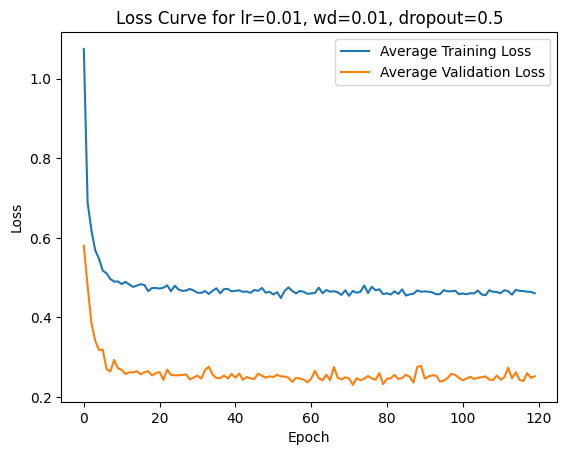


Classification Report:
              precision    recall  f1-score   support

           0     0.8957    0.8990    0.8974      3000
           1     0.9213    0.9680    0.9441      3000
           2     0.9674    0.8617    0.9115      3000
           3     0.9292    0.9530    0.9409      3000
           4     0.9310    0.9583    0.9445      3000

    accuracy                         0.9280     15000
   macro avg     0.9289    0.9280    0.9277     15000
weighted avg     0.9289    0.9280    0.9277     15000


Testing combination: learning_rate=0.001, weight_decay=0, dropout_prob=0

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.50it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.47it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.49it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.50it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.47it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:32<00:00,  3.64it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.49it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:33<00:00,  3.53it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:33<00:00,  3.58it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.45it/s]



Results for combination: learning_rate=0.001, weight_decay=0, dropout_prob=0
Average Accuracy: 98.17%
Average Fold Duration: 34.18 seconds


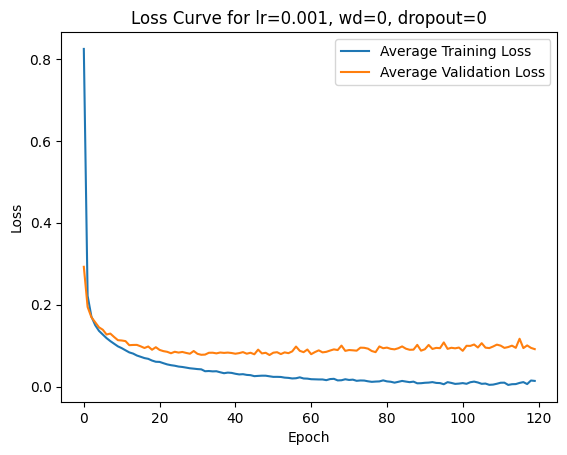


Classification Report:
              precision    recall  f1-score   support

           0     0.9706    0.9783    0.9744      3000
           1     0.9907    0.9937    0.9922      3000
           2     0.9852    0.9787    0.9819      3000
           3     0.9797    0.9830    0.9814      3000
           4     0.9825    0.9750    0.9788      3000

    accuracy                         0.9817     15000
   macro avg     0.9818    0.9817    0.9817     15000
weighted avg     0.9818    0.9817    0.9817     15000


Testing combination: learning_rate=0.001, weight_decay=0, dropout_prob=0.2

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.07it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.08it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.10it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.02it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]



Results for combination: learning_rate=0.001, weight_decay=0, dropout_prob=0.2
Average Accuracy: 97.73%
Average Fold Duration: 38.72 seconds


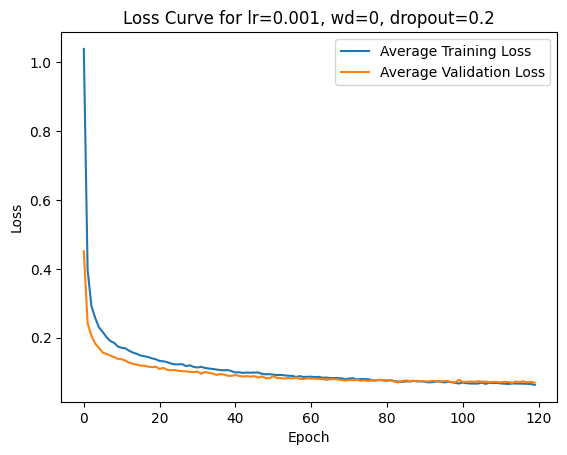


Classification Report:
              precision    recall  f1-score   support

           0     0.9569    0.9770    0.9668      3000
           1     0.9868    0.9950    0.9909      3000
           2     0.9876    0.9560    0.9715      3000
           3     0.9784    0.9823    0.9804      3000
           4     0.9773    0.9760    0.9767      3000

    accuracy                         0.9773     15000
   macro avg     0.9774    0.9773    0.9773     15000
weighted avg     0.9774    0.9773    0.9773     15000


Testing combination: learning_rate=0.001, weight_decay=0, dropout_prob=0.5

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.05it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.99it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.10it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.99it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.15it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.09it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.10it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.15it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:38<00:00,  3.15it/s]



Results for combination: learning_rate=0.001, weight_decay=0, dropout_prob=0.5
Average Accuracy: 96.00%
Average Fold Duration: 38.85 seconds


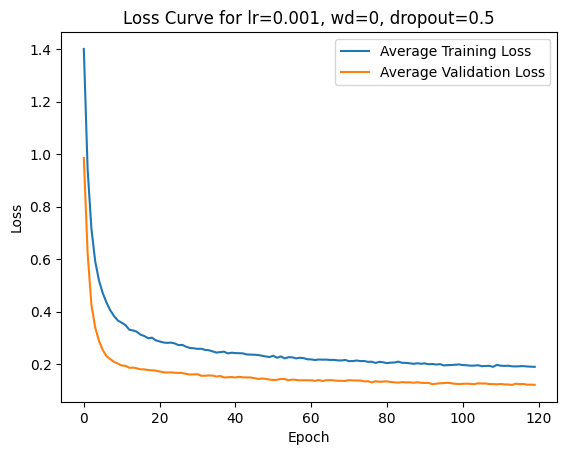


Classification Report:
              precision    recall  f1-score   support

           0     0.9171    0.9623    0.9392      3000
           1     0.9674    0.9907    0.9789      3000
           2     0.9930    0.9003    0.9444      3000
           3     0.9718    0.9663    0.9691      3000
           4     0.9558    0.9803    0.9679      3000

    accuracy                         0.9600     15000
   macro avg     0.9610    0.9600    0.9599     15000
weighted avg     0.9610    0.9600    0.9599     15000


Testing combination: learning_rate=0.001, weight_decay=0.1, dropout_prob=0

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.26it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.35it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.26it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.34it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.33it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.33it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.33it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.25it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.30it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.27it/s]



Results for combination: learning_rate=0.001, weight_decay=0.1, dropout_prob=0
Average Accuracy: 20.00%
Average Fold Duration: 36.36 seconds


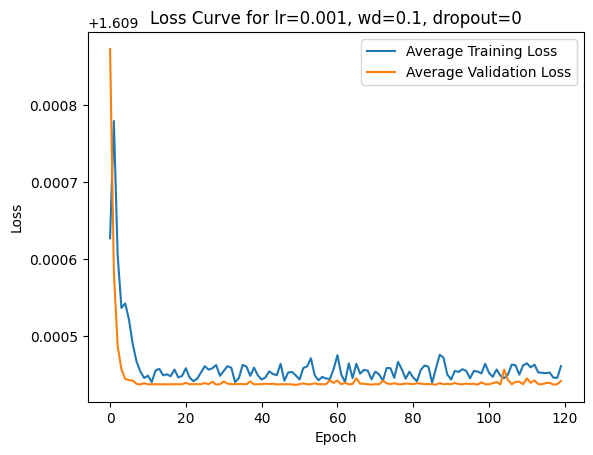


Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0     0.2000    0.3000    0.2400      3000
           1     0.2000    0.1000    0.1333      3000
           2     0.0000    0.0000    0.0000      3000
           3     0.2000    0.2000    0.2000      3000
           4     0.2000    0.4000    0.2667      3000

    accuracy                         0.2000     15000
   macro avg     0.1600    0.2000    0.1680     15000
weighted avg     0.1600    0.2000    0.1680     15000


Testing combination: learning_rate=0.001, weight_decay=0.1, dropout_prob=0.2

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.96it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.96it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.94it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  3.00it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:41<00:00,  2.87it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.95it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.95it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.95it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Results for combination: learning_rate=0.001, weight_decay=0.1, dropout_prob=0.2
Average Accuracy: 20.00%
Average Fold Duration: 40.55 seconds


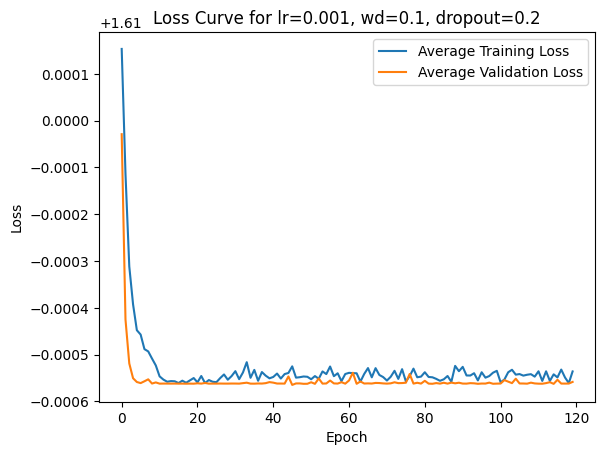


Classification Report:
              precision    recall  f1-score   support

           0     0.2000    0.2000    0.2000      3000
           1     0.2000    0.2000    0.2000      3000
           2     0.2000    0.3000    0.2400      3000
           3     0.2000    0.2000    0.2000      3000
           4     0.2000    0.1000    0.1333      3000

    accuracy                         0.2000     15000
   macro avg     0.2000    0.2000    0.1947     15000
weighted avg     0.2000    0.2000    0.1947     15000


Testing combination: learning_rate=0.001, weight_decay=0.1, dropout_prob=0.5

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.94it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.93it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:42<00:00,  2.83it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.97it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:41<00:00,  2.92it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.94it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:42<00:00,  2.83it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.00it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.03it/s]



Results for combination: learning_rate=0.001, weight_decay=0.1, dropout_prob=0.5
Average Accuracy: 20.00%
Average Fold Duration: 40.88 seconds


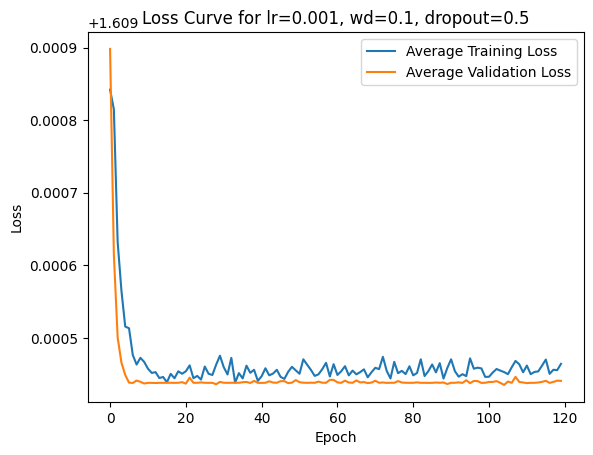


Classification Report:
              precision    recall  f1-score   support

           0     0.2000    0.1000    0.1333      3000
           1     0.2000    0.4000    0.2667      3000
           2     0.2000    0.2000    0.2000      3000
           3     0.2000    0.1000    0.1333      3000
           4     0.2000    0.2000    0.2000      3000

    accuracy                         0.2000     15000
   macro avg     0.2000    0.2000    0.1867     15000
weighted avg     0.2000    0.2000    0.1867     15000


Testing combination: learning_rate=0.001, weight_decay=0.01, dropout_prob=0

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.35it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.35it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:34<00:00,  3.51it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:37<00:00,  3.24it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.37it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.31it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:35<00:00,  3.37it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:36<00:00,  3.32it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:37<00:00,  3.16it/s]



Results for combination: learning_rate=0.001, weight_decay=0.01, dropout_prob=0
Average Accuracy: 94.95%
Average Fold Duration: 36.23 seconds


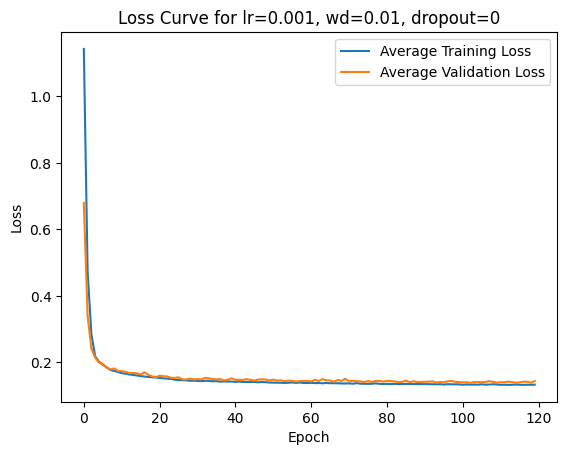


Classification Report:
              precision    recall  f1-score   support

           0     0.9092    0.9450    0.9268      3000
           1     0.9633    0.9803    0.9717      3000
           2     0.9728    0.8947    0.9321      3000
           3     0.9371    0.9730    0.9547      3000
           4     0.9689    0.9543    0.9615      3000

    accuracy                         0.9495     15000
   macro avg     0.9503    0.9495    0.9494     15000
weighted avg     0.9503    0.9495    0.9494     15000


Testing combination: learning_rate=0.001, weight_decay=0.01, dropout_prob=0.2

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:41<00:00,  2.88it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.95it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.99it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.99it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.03it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.93it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.96it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.03it/s]



Results for combination: learning_rate=0.001, weight_decay=0.01, dropout_prob=0.2
Average Accuracy: 94.64%
Average Fold Duration: 40.39 seconds


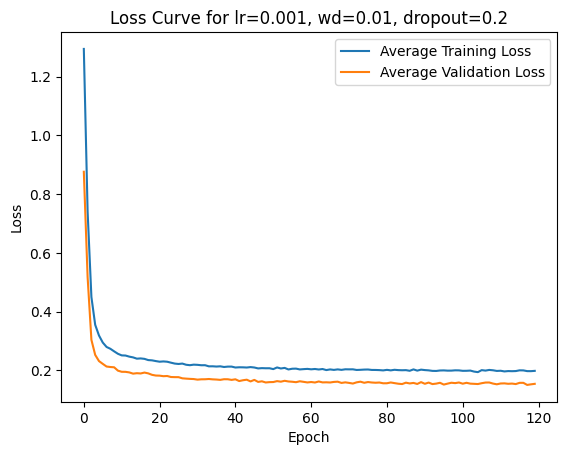


Classification Report:
              precision    recall  f1-score   support

           0     0.9080    0.9340    0.9208      3000
           1     0.9572    0.9833    0.9701      3000
           2     0.9672    0.8957    0.9301      3000
           3     0.9416    0.9670    0.9541      3000
           4     0.9606    0.9520    0.9563      3000

    accuracy                         0.9464     15000
   macro avg     0.9469    0.9464    0.9463     15000
weighted avg     0.9469    0.9464    0.9463     15000


Testing combination: learning_rate=0.001, weight_decay=0.01, dropout_prob=0.5

Fold 1/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.02it/s]



Fold 2/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.07it/s]



Fold 3/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.94it/s]



Fold 4/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.97it/s]



Fold 5/10 for current hyperparameters


100%|██████████| 120/120 [00:41<00:00,  2.86it/s]



Fold 6/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.97it/s]



Fold 7/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Fold 8/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.04it/s]



Fold 9/10 for current hyperparameters


100%|██████████| 120/120 [00:40<00:00,  2.95it/s]



Fold 10/10 for current hyperparameters


100%|██████████| 120/120 [00:39<00:00,  3.05it/s]



Results for combination: learning_rate=0.001, weight_decay=0.01, dropout_prob=0.5
Average Accuracy: 93.95%
Average Fold Duration: 40.15 seconds


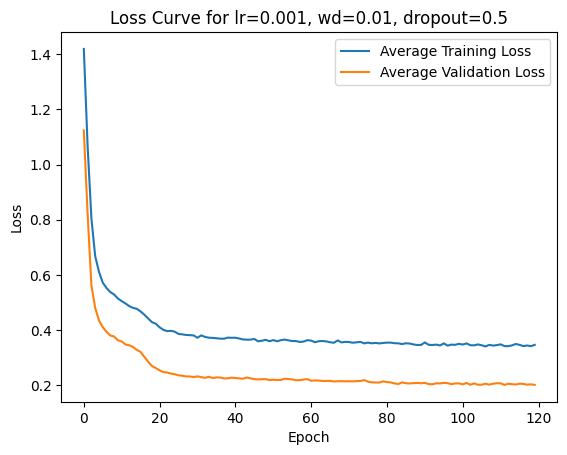


Classification Report:
              precision    recall  f1-score   support

           0     0.9045    0.9187    0.9115      3000
           1     0.9301    0.9673    0.9484      3000
           2     0.9727    0.8893    0.9291      3000
           3     0.9469    0.9567    0.9517      3000
           4     0.9467    0.9653    0.9559      3000

    accuracy                         0.9395     15000
   macro avg     0.9402    0.9395    0.9393     15000
weighted avg     0.9402    0.9395    0.9393     15000


Best configuration:
Learning Rate: 0.001
Weight Decay: 0
Dropout Probability: 0
Average Accuracy: 98.17%


In [ ]:
import itertools
import time
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import torch.optim as optim
import torch
from torch import nn
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Đặt các giá trị của siêu tham số
learning_rates = [0.01, 0.001]
weight_decays = [0, 0.1, 0.01]
dropout_probs = [0, 0.2, 0.5]
k_folds = 10
num_epochs = 120

# Danh sách để lưu kết quả của mỗi cấu hình siêu tham số
grid_search_results = []

# Chia dữ liệu thành 80% cho StratifiedKFold và 20% cho testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Khởi tạo Grid Search với các tổ hợp tham số
for lr, wd, dp in itertools.product(learning_rates, weight_decays, dropout_probs):
    print(f"\nTesting combination: learning_rate={lr}, weight_decay={wd}, dropout_prob={dp}")

    all_y_true = []
    all_y_pred = []

    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Các danh sách để lưu loss và accuracy của từng fold
    fold_accuracies = [] #danh sách độ chính xác của 1 fold
    fold_train_losses = [] #danh sách giá trị loss train của 1 fold
    fold_val_losses = [] #danh sách giá trị loss validate của 1 fold
    fold_times = [] #danh sách thời gian của 1 fold

    for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
        print(f"\nFold {fold + 1}/{k_folds} for current hyperparameters")

        # Tách dữ liệu huấn luyện và validation cho fold hiện tại
        X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
        y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

        # Chuyển đổi dữ liệu thành tensor
        X_train_fold, y_train_fold = torch.tensor(X_train_fold, dtype=torch.float32), torch.tensor(y_train_fold, dtype=torch.long)
        X_val_fold, y_val_fold = torch.tensor(X_val_fold, dtype=torch.float32), torch.tensor(y_val_fold, dtype=torch.long)

        # Tạo DataLoader
        train_loader = data.DataLoader(data.TensorDataset(X_train_fold, y_train_fold), batch_size=32, shuffle=True)
        val_loader = data.DataLoader(data.TensorDataset(X_val_fold, y_val_fold), batch_size=32)

        # Khởi tạo mô hình với dropout_prob và optimizer với learning_rate, weight_decay cho mỗi fold
        model = NeuralNetwork(dropout_prob=dp)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

        train_losses = []
        val_losses = []

        # Đo thời gian cho fold hiện tại
        start_time = time.time()

        for epoch in tqdm(range(num_epochs)):
            model.train()
            train_loss = 0.0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
            train_loss /= len(train_loader)
            train_losses.append(train_loss)

            # Chế độ đánh giá trên tập validation
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
            val_loss /= len(val_loader)
            val_losses.append(val_loss)

        end_time = time.time()
        fold_duration = end_time - start_time
        fold_times.append(fold_duration)

        fold_train_losses.append(train_losses)
        fold_val_losses.append(val_losses)

        # Đánh giá trên tập kiểm thử cố định
        model.eval()
        y_pred = []
        y_true = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())

        accuracy = accuracy_score(y_true, y_pred)
        fold_accuracies.append(accuracy)
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

    # Tính độ chính xác và thời gian trung bình cộng của từng fold
    avg_accuracy = np.mean(fold_accuracies)
    avg_fold_time = np.mean(fold_times)

    # Lấy giá trị loss trung bình qua các fold
    avg_train_loss = [np.mean([fold_loss[epoch] for fold_loss in fold_train_losses]) for epoch in range(num_epochs)]
    avg_val_loss = [np.mean([fold_loss[epoch] for fold_loss in fold_val_losses]) for epoch in range(num_epochs)]

    # Lưu lại kết quả của mỗi cấu hình
    grid_search_results.append({
        'learning_rate': lr,
        'weight_decay': wd,
        'dropout_prob': dp,
        'avg_accuracy': avg_accuracy,
        'avg_fold_time': avg_fold_time
    })
    print(f"\nResults for combination: learning_rate={lr}, weight_decay={wd}, dropout_prob={dp}")
    print(f"Average Accuracy: {avg_accuracy * 100:.2f}%")
    print(f"Average Fold Duration: {avg_fold_time:.2f} seconds")

    # Vẽ biểu đồ hàm loss trung bình qua các fold
    plt.plot(range(num_epochs), avg_train_loss, label='Average Training Loss')
    plt.plot(range(num_epochs), avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss Curve for lr={lr}, wd={wd}, dropout={dp}')
    plt.show()

    # Classification Report cho tổ hợp hiện tại
    print("\nClassification Report:")
    print(classification_report(all_y_true, all_y_pred, digits=4))

# Tìm cấu hình tốt nhất dựa trên độ chính xác
best_config = max(grid_search_results, key=lambda x: x['avg_accuracy'])
print("\nBest configuration:")
print(f"Learning Rate: {best_config['learning_rate']}")
print(f"Weight Decay: {best_config['weight_decay']}")
print(f"Dropout Probability: {best_config['dropout_prob']}")
print(f"Average Accuracy: {best_config['avg_accuracy'] * 100:.2f}%")


# **B4: Tinh chỉnh số lần lặp và hoàn thiện mô hình cuối cùng**

**1. Mạng sử dụng**

In [ ]:
#32-64-64-32
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob = 0):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(32, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(32, 5),         # Lớp ẩn thứ bảy với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
        )

    def forward(self, x):
        return self.network(x)


**2. Tinh chỉnh lần cuối**

Epoch [1/80], Train Loss: 0.9686, Test Loss: 0.3668, Test Accuracy: 89.47%
Epoch [2/80], Train Loss: 0.2422, Test Loss: 0.2049, Test Accuracy: 93.13%
Epoch [3/80], Train Loss: 0.1646, Test Loss: 0.1577, Test Accuracy: 94.93%
Epoch [4/80], Train Loss: 0.1425, Test Loss: 0.1408, Test Accuracy: 94.80%
Epoch [5/80], Train Loss: 0.1258, Test Loss: 0.1430, Test Accuracy: 95.60%
Epoch [6/80], Train Loss: 0.1169, Test Loss: 0.1149, Test Accuracy: 95.87%
Epoch [7/80], Train Loss: 0.1095, Test Loss: 0.1062, Test Accuracy: 95.80%
Epoch [8/80], Train Loss: 0.1050, Test Loss: 0.1036, Test Accuracy: 96.00%
Epoch [9/80], Train Loss: 0.1012, Test Loss: 0.1022, Test Accuracy: 96.00%
Epoch [10/80], Train Loss: 0.0980, Test Loss: 0.1028, Test Accuracy: 96.27%
Epoch [11/80], Train Loss: 0.0918, Test Loss: 0.0915, Test Accuracy: 96.33%
Epoch [12/80], Train Loss: 0.0885, Test Loss: 0.0845, Test Accuracy: 96.40%
Epoch [13/80], Train Loss: 0.0837, Test Loss: 0.0813, Test Accuracy: 96.80%
Epoch [14/80], Train 

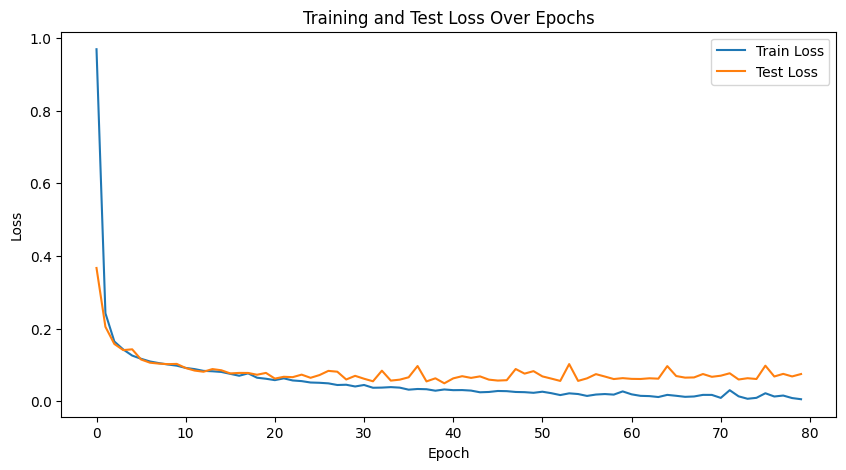

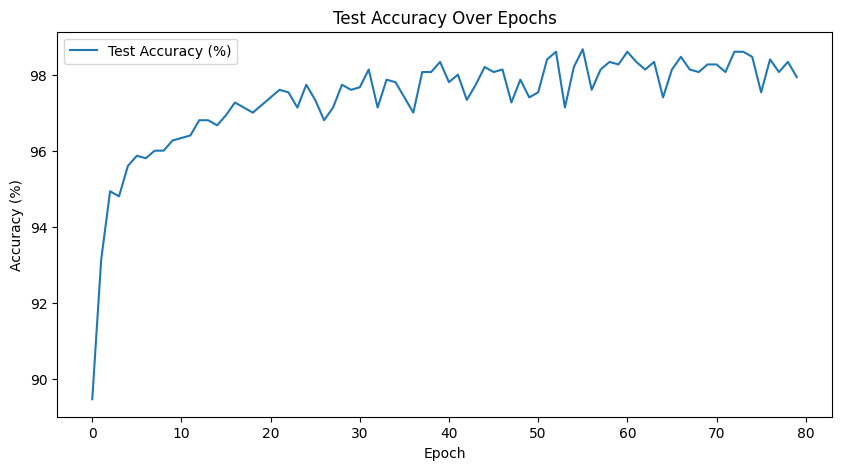

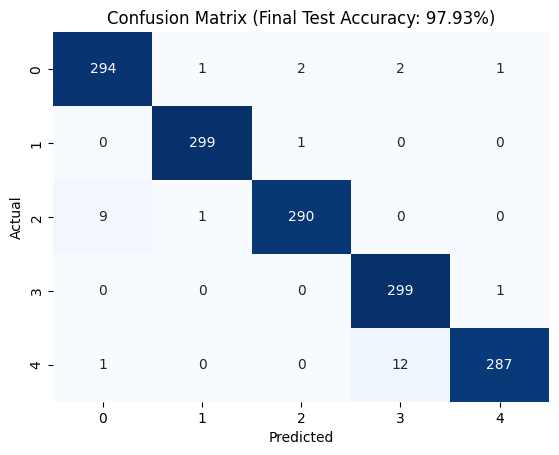


Classification Report:
              precision    recall  f1-score   support

           0     0.9671    0.9800    0.9735       300
           1     0.9934    0.9967    0.9950       300
           2     0.9898    0.9667    0.9781       300
           3     0.9553    0.9967    0.9755       300
           4     0.9931    0.9567    0.9745       300

    accuracy                         0.9793      1500
   macro avg     0.9797    0.9793    0.9793      1500
weighted avg     0.9797    0.9793    0.9793      1500



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_and_evaluate_model(X_train_val, X_test, y_train_val, y_test, model, learning_rate=0.001, weight_decay=0, dropout_prob=0, num_epochs=120, batch_size=32):
    # Chuyển đổi dữ liệu thành tensor
    X_train_val_tensor = torch.tensor(X_train_val, dtype=torch.float32)
    y_train_val_tensor = torch.tensor(y_train_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Tạo DataLoader cho tập huấn luyện-validation và tập kiểm thử
    train_val_loader = data.DataLoader(data.TensorDataset(X_train_val_tensor, y_train_val_tensor), batch_size=batch_size, shuffle=True)
    test_loader = data.DataLoader(data.TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)

    # Khởi tạo mô hình và optimizer
    model = NeuralNetwork(dropout_prob=dropout_prob)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Danh sách để lưu lại loss và accuracy trong quá trình huấn luyện
    train_losses = []
    val_losses = []
    val_accuracies = []  # List to store accuracy for each epoch

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0

        # Huấn luyện trên toàn bộ tập huấn luyện
        for inputs, labels in train_val_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # Tính loss trung bình cho tập huấn luyện
        avg_train_loss = running_train_loss / len(train_val_loader)
        train_losses.append(avg_train_loss)

        # Đánh giá trên tập kiểm thử
        model.eval()
        running_val_loss = 0.0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                # Dự đoán
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Tính loss và accuracy trung bình cho tập kiểm thử
        avg_val_loss = running_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        # Tính độ chính xác cho epoch hiện tại
        epoch_accuracy = accuracy_score(all_labels, all_preds)
        val_accuracies.append(epoch_accuracy * 100)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_val_loss:.4f}, Test Accuracy: {epoch_accuracy * 100:.2f}%")

    # Vẽ đồ thị hàm loss cho tập huấn luyện và kiểm thử
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Test Loss Over Epochs')
    plt.show()

    # Vẽ đồ thị accuracy cho tập kiểm thử qua các epochs
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_epochs), val_accuracies, label='Test Accuracy (%)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Test Accuracy Over Epochs')
    plt.show()

    # Vẽ biểu đồ độ chính xác dự đoán trên tập kiểm thử
    sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Final Test Accuracy: {val_accuracies[-1]:.2f}%)')
    plt.show()

    # In classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, digits=4))

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Gọi hàm huấn luyện với các siêu tham số mong muốn
train_and_evaluate_model(X_train_val, X_test, y_train_val, y_test, NeuralNetwork(), learning_rate=0.001, weight_decay=0, dropout_prob=0, num_epochs=80, batch_size=32)


Fold 1/10
Epoch [1/50], Train Loss: 0.7238, Validation Loss: 0.3171
Epoch [16/50], Train Loss: 0.0643, Validation Loss: 0.0953
Epoch [31/50], Train Loss: 0.0388, Validation Loss: 0.0621
Epoch [46/50], Train Loss: 0.0216, Validation Loss: 0.0899
Fold 1/10 - Test Accuracy on fixed test set: 98.53%
Fold 1/10 - Duration: 30.98 seconds
Fold 2/10
Epoch [1/50], Train Loss: 0.7363, Validation Loss: 0.2304
Epoch [16/50], Train Loss: 0.0737, Validation Loss: 0.0945
Epoch [31/50], Train Loss: 0.0417, Validation Loss: 0.0872
Epoch [46/50], Train Loss: 0.0249, Validation Loss: 0.0960
Fold 2/10 - Test Accuracy on fixed test set: 98.13%
Fold 2/10 - Duration: 23.17 seconds
Fold 3/10
Epoch [1/50], Train Loss: 0.7788, Validation Loss: 0.3092
Epoch [16/50], Train Loss: 0.0789, Validation Loss: 0.0945
Epoch [31/50], Train Loss: 0.0458, Validation Loss: 0.0815
Epoch [46/50], Train Loss: 0.0248, Validation Loss: 0.0787
Fold 3/10 - Test Accuracy on fixed test set: 97.67%
Fold 3/10 - Duration: 21.29 seconds
F

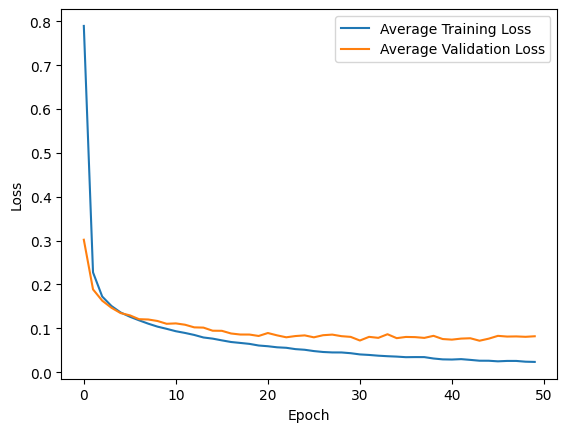

Average Test Accuracy over 10 folds on fixed test set: 97.61%
Average Duration per Fold: 23.31 seconds


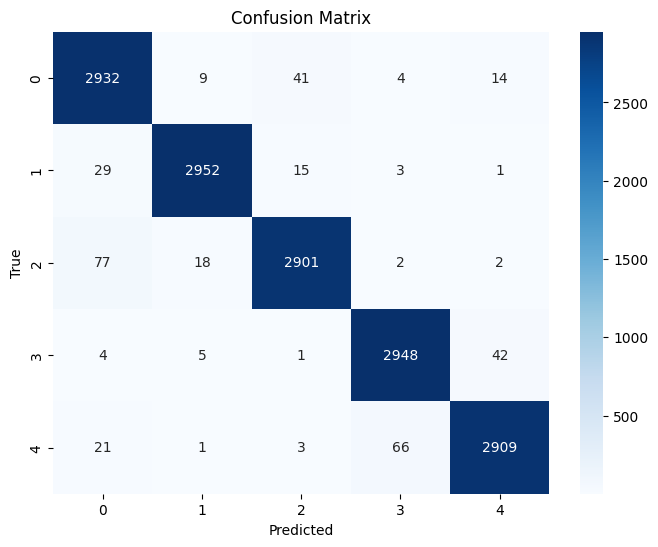


Classification Report:
              precision    recall  f1-score   support

           0     0.9572    0.9773    0.9672      3000
           1     0.9889    0.9840    0.9865      3000
           2     0.9797    0.9670    0.9733      3000
           3     0.9752    0.9827    0.9789      3000
           4     0.9801    0.9697    0.9749      3000

    accuracy                         0.9761     15000
   macro avg     0.9762    0.9761    0.9762     15000
weighted avg     0.9762    0.9761    0.9762     15000



In [ ]:
import time
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import torch.optim as optim
import torch
from torch import nn
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chia dữ liệu thành 80% cho StratifiedKFold và 20% cho testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Khởi tạo StratifiedKFold cho dữ liệu huấn luyện/validation (80% dữ liệu)
k_folds = 10
num_epochs = 50
all_fold_accuracies = []
all_fold_train_losses = []
all_fold_val_losses = []
fold_times = []  # Danh sách lưu trữ thời gian của mỗi fold

# Khởi tạo StratifiedKFold
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    print(f"Fold {fold + 1}/{k_folds}")

    # Lấy dữ liệu cho fold hiện tại từ phần dữ liệu huấn luyện/validation
    X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
    y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

    # Chuyển đổi dữ liệu thành tensor
    X_train_fold, y_train_fold = torch.tensor(X_train_fold, dtype=torch.float32), torch.tensor(y_train_fold, dtype=torch.long)
    X_val_fold, y_val_fold = torch.tensor(X_val_fold, dtype=torch.float32), torch.tensor(y_val_fold, dtype=torch.long)

    # Tạo DataLoader cho tập huấn luyện và validation của fold hiện tại
    train_loader = data.DataLoader(data.TensorDataset(X_train_fold, y_train_fold), batch_size=32, shuffle=True)
    val_loader = data.DataLoader(data.TensorDataset(X_val_fold, y_val_fold), batch_size=32)

    # Khởi tạo lại mô hình và optimizer cho mỗi fold
    model = NeuralNetwork()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []

    # Bắt đầu đo thời gian cho fold hiện tại
    start_time = time.time()

    for epoch in range(num_epochs):
        # Chế độ huấn luyện
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Cập nhật trọng số
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Chế độ đánh giá trên tập validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        if epoch % 15 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Đo thời gian kết thúc cho fold hiện tại
    end_time = time.time()
    fold_duration = end_time - start_time
    fold_times.append(fold_duration)


    all_fold_train_losses.append(train_losses)
    all_fold_val_losses.append(val_losses)

    # Đánh giá mô hình trên tập kiểm thử cố định (20%) sau mỗi lần huấn luyện
    model.eval()
    y_pred = []
    y_true = []

    # Chuyển đổi tập kiểm thử cố định thành tensor và DataLoader
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    test_loader = data.DataLoader(data.TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    all_fold_accuracies.append(accuracy)
    all_y_true.extend(y_true)  # Thu thập nhãn thực tế
    all_y_pred.extend(y_pred)  # Thu thập nhãn dự đoán
    print(f"Fold {fold + 1}/{k_folds} - Test Accuracy on fixed test set: {accuracy * 100:.2f}%")
    print(f"Fold {fold + 1}/{k_folds} - Duration: {fold_duration:.2f} seconds")

# Tính trung bình loss và accuracy qua tất cả các folds
avg_train_loss = [np.mean([fold_loss[epoch] for fold_loss in all_fold_train_losses]) for epoch in range(num_epochs)]
avg_val_loss = [np.mean([fold_loss[epoch] for fold_loss in all_fold_val_losses]) for epoch in range(num_epochs)]
avg_accuracy = np.mean(all_fold_accuracies)
avg_fold_time = np.mean(fold_times)

# Vẽ biểu đồ hàm loss trung bình của training và validation qua các fold
plt.plot(range(num_epochs), avg_train_loss, label='Average Training Loss')
plt.plot(range(num_epochs), avg_val_loss, label='Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"Average Test Accuracy over {k_folds} folds on fixed test set: {avg_accuracy * 100:.2f}%")
print(f"Average Duration per Fold: {avg_fold_time:.2f} seconds")

# Tính confusion matrix
conf_matrix = confusion_matrix(all_y_true, all_y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tính accuracy, precision, recall và f1-score
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, digits=4))


# **B5: Mô hình cuối cùng**
Note: Huấn luyện trên toàn bộ 80% dữ liệu (không chia folds) và test trên 20% tập testing (mô hình chưa thây)

In [ ]:
#32-64-64-32
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob = 0):
        super(NeuralNetwork, self).__init__()
        # Sử dụng Sequential để kết hợp Linear và LeakyReLU
        self.network = nn.Sequential(
            nn.Linear(13, 32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(32, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Dropout(dropout_prob),
            nn.Linear(32, 5),         # Lớp ẩn thứ bảy với 16 neuron
            nn.LeakyReLU(negative_slope=0.02),
        )

    def forward(self, x):
        return self.network(x)


Training Epochs:   2%|▏         | 1/65 [00:00<00:21,  2.93it/s]

Epoch [1/65], Train Loss: 0.8696


Training Epochs:   3%|▎         | 2/65 [00:00<00:21,  2.91it/s]

Epoch [2/65], Train Loss: 0.1907


Training Epochs:   5%|▍         | 3/65 [00:01<00:21,  2.88it/s]

Epoch [3/65], Train Loss: 0.1512


Training Epochs:   6%|▌         | 4/65 [00:01<00:20,  2.93it/s]

Epoch [4/65], Train Loss: 0.1417


Training Epochs:   8%|▊         | 5/65 [00:01<00:20,  2.91it/s]

Epoch [5/65], Train Loss: 0.1296


Training Epochs:   9%|▉         | 6/65 [00:02<00:20,  2.89it/s]

Epoch [6/65], Train Loss: 0.1206


Training Epochs:  11%|█         | 7/65 [00:02<00:19,  2.93it/s]

Epoch [7/65], Train Loss: 0.1127


Training Epochs:  12%|█▏        | 8/65 [00:02<00:20,  2.81it/s]

Epoch [8/65], Train Loss: 0.1035


Training Epochs:  14%|█▍        | 9/65 [00:03<00:20,  2.80it/s]

Epoch [9/65], Train Loss: 0.1010


Training Epochs:  15%|█▌        | 10/65 [00:03<00:19,  2.80it/s]

Epoch [10/65], Train Loss: 0.0908


Training Epochs:  17%|█▋        | 11/65 [00:03<00:19,  2.82it/s]

Epoch [11/65], Train Loss: 0.0884


Training Epochs:  18%|█▊        | 12/65 [00:04<00:19,  2.79it/s]

Epoch [12/65], Train Loss: 0.0842


Training Epochs:  20%|██        | 13/65 [00:04<00:18,  2.80it/s]

Epoch [13/65], Train Loss: 0.0846


Training Epochs:  22%|██▏       | 14/65 [00:04<00:17,  2.86it/s]

Epoch [14/65], Train Loss: 0.0785


Training Epochs:  23%|██▎       | 15/65 [00:05<00:17,  2.85it/s]

Epoch [15/65], Train Loss: 0.0721


Training Epochs:  25%|██▍       | 16/65 [00:05<00:17,  2.87it/s]

Epoch [16/65], Train Loss: 0.0728


Training Epochs:  26%|██▌       | 17/65 [00:05<00:16,  2.89it/s]

Epoch [17/65], Train Loss: 0.0693


Training Epochs:  28%|██▊       | 18/65 [00:06<00:16,  2.87it/s]

Epoch [18/65], Train Loss: 0.0664


Training Epochs:  29%|██▉       | 19/65 [00:06<00:15,  2.90it/s]

Epoch [19/65], Train Loss: 0.0648


Training Epochs:  31%|███       | 20/65 [00:06<00:15,  2.89it/s]

Epoch [20/65], Train Loss: 0.0573


Training Epochs:  32%|███▏      | 21/65 [00:07<00:15,  2.89it/s]

Epoch [21/65], Train Loss: 0.0556


Training Epochs:  34%|███▍      | 22/65 [00:07<00:14,  2.89it/s]

Epoch [22/65], Train Loss: 0.0555


Training Epochs:  35%|███▌      | 23/65 [00:08<00:14,  2.80it/s]

Epoch [23/65], Train Loss: 0.0534


Training Epochs:  37%|███▋      | 24/65 [00:08<00:14,  2.84it/s]

Epoch [24/65], Train Loss: 0.0505


Training Epochs:  38%|███▊      | 25/65 [00:08<00:14,  2.81it/s]

Epoch [25/65], Train Loss: 0.0505


Training Epochs:  40%|████      | 26/65 [00:09<00:14,  2.78it/s]

Epoch [26/65], Train Loss: 0.0473


Training Epochs:  42%|████▏     | 27/65 [00:09<00:13,  2.74it/s]

Epoch [27/65], Train Loss: 0.0483


Training Epochs:  43%|████▎     | 28/65 [00:10<00:15,  2.46it/s]

Epoch [28/65], Train Loss: 0.0439


Training Epochs:  45%|████▍     | 29/65 [00:10<00:15,  2.38it/s]

Epoch [29/65], Train Loss: 0.0450


Training Epochs:  46%|████▌     | 30/65 [00:10<00:15,  2.24it/s]

Epoch [30/65], Train Loss: 0.0442


Training Epochs:  48%|████▊     | 31/65 [00:11<00:15,  2.21it/s]

Epoch [31/65], Train Loss: 0.0439


Training Epochs:  49%|████▉     | 32/65 [00:11<00:15,  2.15it/s]

Epoch [32/65], Train Loss: 0.0462


Training Epochs:  51%|█████     | 33/65 [00:12<00:15,  2.09it/s]

Epoch [33/65], Train Loss: 0.0377


Training Epochs:  52%|█████▏    | 34/65 [00:12<00:15,  2.01it/s]

Epoch [34/65], Train Loss: 0.0439


Training Epochs:  54%|█████▍    | 35/65 [00:13<00:14,  2.10it/s]

Epoch [35/65], Train Loss: 0.0354


Training Epochs:  55%|█████▌    | 36/65 [00:13<00:12,  2.31it/s]

Epoch [36/65], Train Loss: 0.0355


Training Epochs:  57%|█████▋    | 37/65 [00:14<00:11,  2.43it/s]

Epoch [37/65], Train Loss: 0.0342


Training Epochs:  58%|█████▊    | 38/65 [00:14<00:10,  2.59it/s]

Epoch [38/65], Train Loss: 0.0367


Training Epochs:  60%|██████    | 39/65 [00:14<00:09,  2.71it/s]

Epoch [39/65], Train Loss: 0.0330


Training Epochs:  62%|██████▏   | 40/65 [00:15<00:09,  2.74it/s]

Epoch [40/65], Train Loss: 0.0308


Training Epochs:  63%|██████▎   | 41/65 [00:15<00:08,  2.82it/s]

Epoch [41/65], Train Loss: 0.0356


Training Epochs:  65%|██████▍   | 42/65 [00:15<00:08,  2.84it/s]

Epoch [42/65], Train Loss: 0.0279


Training Epochs:  66%|██████▌   | 43/65 [00:16<00:07,  2.81it/s]

Epoch [43/65], Train Loss: 0.0287


Training Epochs:  68%|██████▊   | 44/65 [00:16<00:07,  2.87it/s]

Epoch [44/65], Train Loss: 0.0284


Training Epochs:  69%|██████▉   | 45/65 [00:16<00:06,  2.89it/s]

Epoch [45/65], Train Loss: 0.0263


Training Epochs:  71%|███████   | 46/65 [00:17<00:06,  2.84it/s]

Epoch [46/65], Train Loss: 0.0283


Training Epochs:  72%|███████▏  | 47/65 [00:17<00:06,  2.89it/s]

Epoch [47/65], Train Loss: 0.0270


Training Epochs:  74%|███████▍  | 48/65 [00:17<00:05,  2.91it/s]

Epoch [48/65], Train Loss: 0.0256


Training Epochs:  75%|███████▌  | 49/65 [00:18<00:05,  2.87it/s]

Epoch [49/65], Train Loss: 0.0275


Training Epochs:  77%|███████▋  | 50/65 [00:18<00:05,  2.91it/s]

Epoch [50/65], Train Loss: 0.0241


Training Epochs:  78%|███████▊  | 51/65 [00:18<00:04,  2.92it/s]

Epoch [51/65], Train Loss: 0.0205


Training Epochs:  80%|████████  | 52/65 [00:19<00:04,  2.86it/s]

Epoch [52/65], Train Loss: 0.0215


Training Epochs:  82%|████████▏ | 53/65 [00:19<00:04,  2.88it/s]

Epoch [53/65], Train Loss: 0.0207


Training Epochs:  83%|████████▎ | 54/65 [00:19<00:03,  2.89it/s]

Epoch [54/65], Train Loss: 0.0183


Training Epochs:  85%|████████▍ | 55/65 [00:20<00:03,  2.82it/s]

Epoch [55/65], Train Loss: 0.0204


Training Epochs:  86%|████████▌ | 56/65 [00:20<00:03,  2.84it/s]

Epoch [56/65], Train Loss: 0.0199


Training Epochs:  88%|████████▊ | 57/65 [00:21<00:02,  2.75it/s]

Epoch [57/65], Train Loss: 0.0219


Training Epochs:  89%|████████▉ | 58/65 [00:21<00:02,  2.77it/s]

Epoch [58/65], Train Loss: 0.0241


Training Epochs:  91%|█████████ | 59/65 [00:21<00:02,  2.81it/s]

Epoch [59/65], Train Loss: 0.0229


Training Epochs:  92%|█████████▏| 60/65 [00:22<00:01,  2.73it/s]

Epoch [60/65], Train Loss: 0.0121


Training Epochs:  94%|█████████▍| 61/65 [00:22<00:01,  2.80it/s]

Epoch [61/65], Train Loss: 0.0140


Training Epochs:  95%|█████████▌| 62/65 [00:22<00:01,  2.84it/s]

Epoch [62/65], Train Loss: 0.0174


Training Epochs:  97%|█████████▋| 63/65 [00:23<00:00,  2.79it/s]

Epoch [63/65], Train Loss: 0.0295


Training Epochs:  98%|█████████▊| 64/65 [00:23<00:00,  2.52it/s]

Epoch [64/65], Train Loss: 0.0148


Training Epochs: 100%|██████████| 65/65 [00:24<00:00,  2.69it/s]


Epoch [65/65], Train Loss: 0.0167


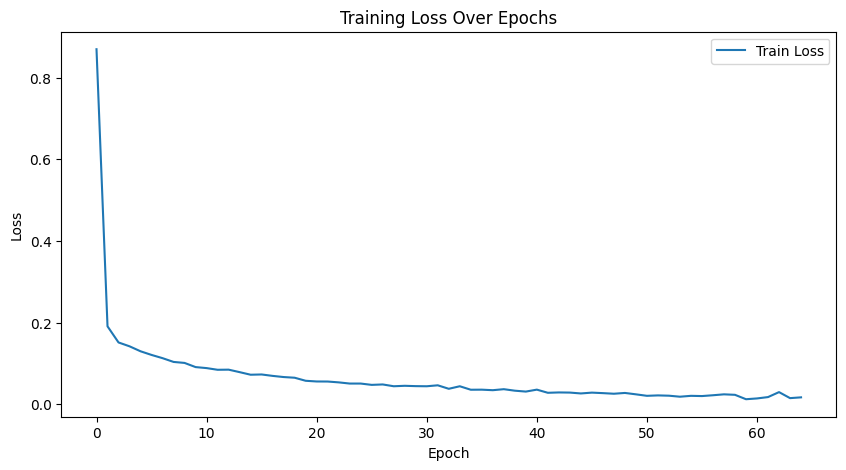

Testing Accuracy: 97.93%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.9735    0.9800    0.9767       300
           1     0.9867    0.9900    0.9884       300
           2     0.9833    0.9800    0.9816       300
           3     0.9734    0.9767    0.9750       300
           4     0.9798    0.9700    0.9749       300

    accuracy                         0.9793      1500
   macro avg     0.9793    0.9793    0.9793      1500
weighted avg     0.9793    0.9793    0.9793      1500



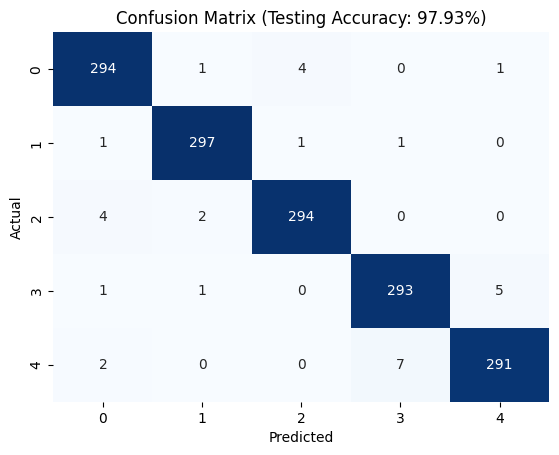

Model saved to /content/drive/MyDrive/LayerClassification/finalNN_model.pth


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


def save_model(model, model_save_path):
    """
    Lưu mô hình PyTorch vào file.

    :param model: Mô hình PyTorch đã huấn luyện
    :param model_save_path: Đường dẫn tới file để lưu mô hình
    """
    # Lưu trạng thái của mô hình (weights và parameters)
    torch.save(model.state_dict(), model_save_path)
    print(f'Model saved to {model_save_path}')


from tqdm import tqdm  # Import tqdm để hiển thị tiến trình

def train_final_model(X, y, model_class, learning_rate=0.001, weight_decay=0, dropout_prob=0, num_epochs=120, batch_size=32):
    # Chia tập dữ liệu thành training (80%) và testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Chuyển đổi dữ liệu thành tensor
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Tạo DataLoader cho tập training và testing
    train_loader = data.DataLoader(data.TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
    test_loader = data.DataLoader(data.TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

    # Khởi tạo mô hình và optimizer
    model = NeuralNetwork(dropout_prob=dropout_prob)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Danh sách để lưu lại loss trong quá trình huấn luyện
    train_losses = []

    # Sử dụng tqdm để hiển thị tiến trình của từng epoch
    for epoch in tqdm(range(num_epochs), desc="Training Epochs"):
        model.train()
        running_train_loss = 0.0

        # Huấn luyện trên tập training
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # Tính loss trung bình cho tập huấn luyện
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        tqdm.write(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

    # Vẽ đồ thị hàm loss cho tập huấn luyện
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss Over Epochs')
    plt.show()

    # Đánh giá mô hình trên tập testing
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # In độ chính xác và classification report
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Testing Accuracy: {accuracy * 100:.2f}%")

    print("\nClassification Report (Test Set):")
    print(classification_report(all_labels, all_preds, digits=4))

    # Vẽ ma trận nhầm lẫn
    sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Testing Accuracy: {accuracy * 100:.2f}%)')
    plt.show()

    # Lưu mô hình
    save_model(model, '/content/drive/MyDrive/LayerClassification/finalNN_model.pth')



# Gọi hàm huấn luyện với toàn bộ dữ liệu
train_final_model(X, y, NeuralNetwork(), learning_rate=0.001, weight_decay=0, dropout_prob=0, num_epochs=65, batch_size=32)
